# Description
Given the details of a Sendy order, this model will use historic data to predict an accurate time for the arrival of the rider at the destination of a package.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Importing necessary libraries for data wrangling, manipulation and visualization

To begin, we will create a basic regression model with the scikit-learn library and the dataset provided by the Sendy Logistics Challenge on Zindi. The data can be found __[here.](https://zindi.africa/competitions/sendy-logistics-challenge/data)__

In [8]:
# This base version of our model will attempt to find a linear relationship within the dataset.
# First, we import the necessary part of the scikit-learn library and the dataset into a Pandas Dataframe.

from sklearn.linear_model import LinearRegression
eta_model = LinearRegression()

training_data = pd.read_csv("data/Train.csv")
training_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


Next, we will attempt to train our model with the variable that currently has the highest
value of correlation, (Total distance in kilometers, based off road distance), with our
target variable, (Total time to arrival from the point of pickup to the destination).

In [9]:
eta_model.fit(X = training_data[['Distance (KM)']], y = training_data['Time from Pickup to Arrival'])
eta_model.coef_

array([101.11500695])

After a very simple runthrough of comparing two variables, we find the first parameter of our model to be around 101.12. Visualizing this first draft of our model would like this on a graph:

<AxesSubplot:xlabel='Distance (KM)', ylabel='Time from Pickup to Arrival'>

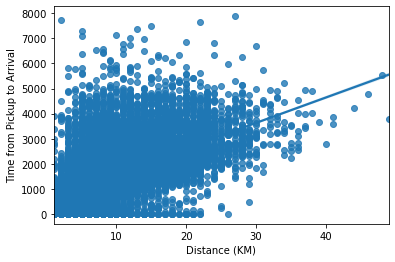

In [12]:
sns.regplot(x = 'Distance (KM)', y = 'Time from Pickup to Arrival', data = training_data)

It's a start, but there's plenty of bias present with a large dataset as this one. Let's begin to think of other ways to paint a clearer relationship with scaling and additional features.